# **Hey!!!**
Searching for something interesting on Kaggle I suddenly ran into this DataSet:<br>
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud <br>
It seems to be interesting as we have:<br>
- Extreme class Imbalance
- 285 000 samples (150mb) <br>
And unknown features extracted with PCA

**Let's Gooo!!!!**<br>
<img src="https://media.tenor.com/rwXThjsOV38AAAAi/peepo-scam.gif">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No NaN, no problem.

In [4]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

Yoo... Do you see this? 0.001727 is a mean value for class feature

In [5]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

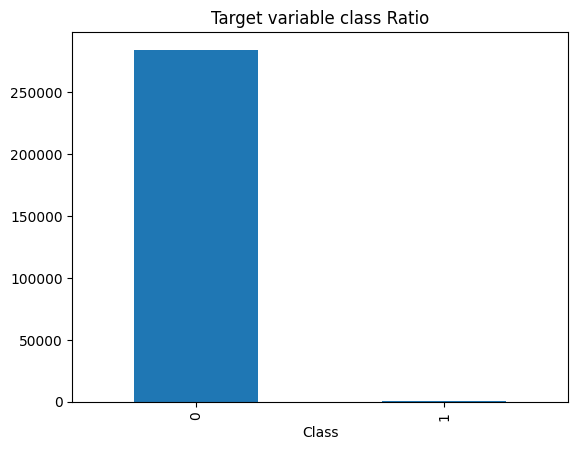

In [6]:
plt.title("Target variable class Ratio")
df["Class"].value_counts().plot(kind="bar");

We don't panic... Everything is okay as long as we have imblearn!

In [7]:
correlations_data = df.corr()

print("Most correlated features: ")
print(correlations_data["Class"].sort_values(ascending=False))

Most correlated features: 
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


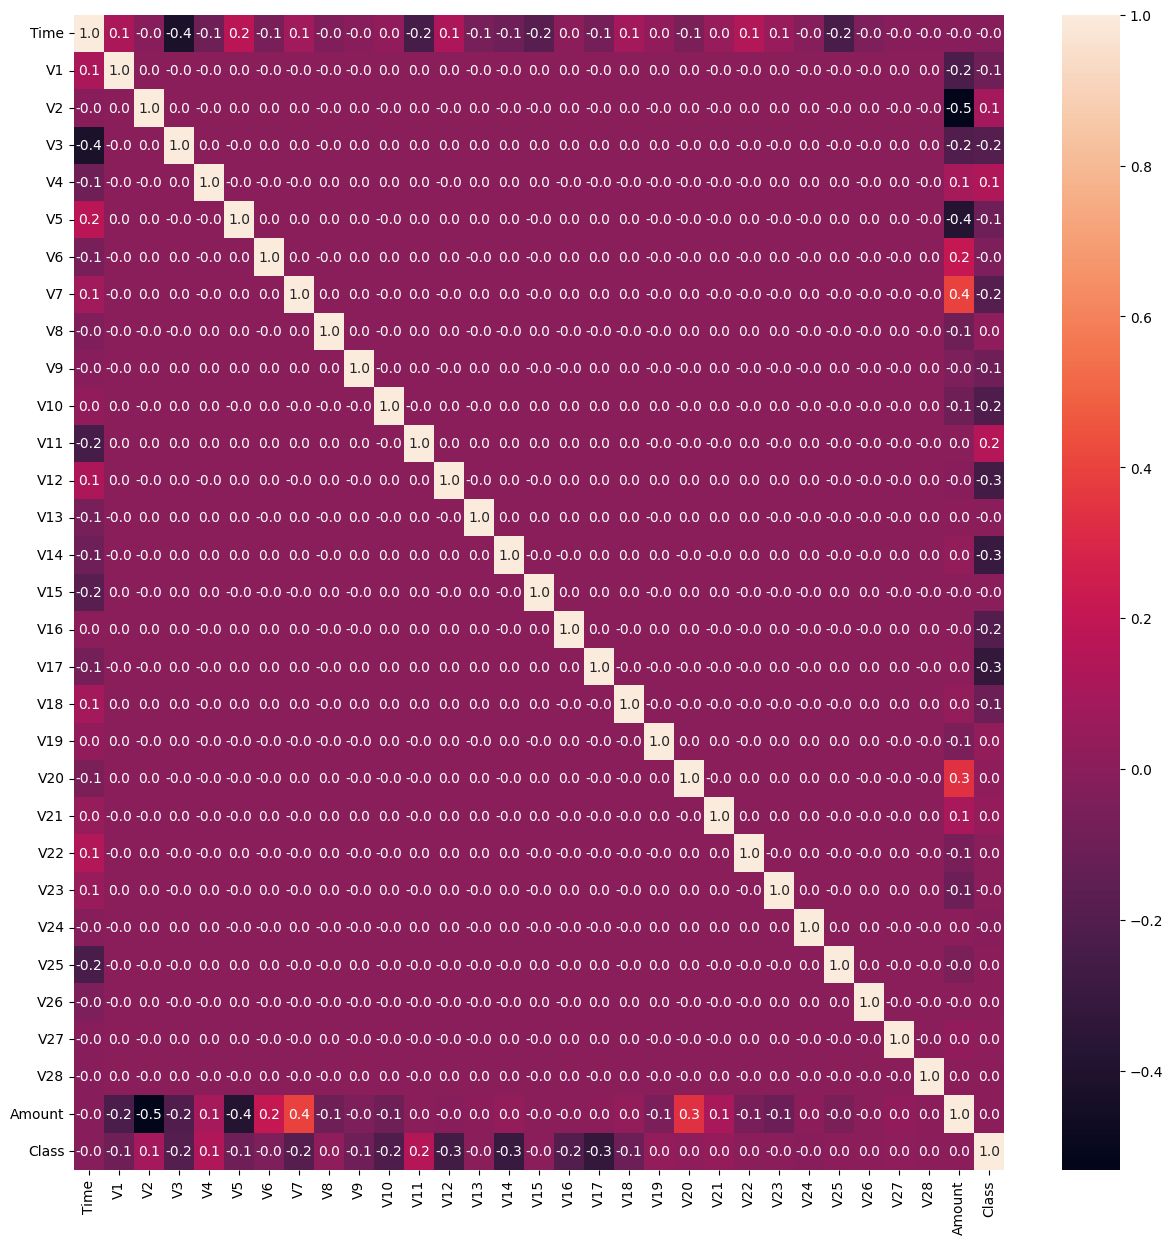

In [8]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlations_data, annot=True, fmt=".1f");

Let's drop some weird features with low abs(coreelation)

In [9]:
for col in df.columns:
    # picked 5 percent, cause there's a pretty big (and important I guess) jump in correlation
    # from 0.04 to 0.09
    if abs(correlations_data["Class"][col]) < 0.05:
        df.drop(col, axis=1, inplace=True)

df.shape

(284807, 15)

Uh, Oh... We droped 16 columns. I'm not sure whether it's right decision, but... We'll see

Let's explore our useful data with plotting now!

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [12]:
rus = RandomUnderSampler()
smote = SMOTE(sampling_strategy={1: 2_000})

In [13]:
X_smt, y_smt = smote.fit_resample(X, y)

In [14]:
X_final, y_final = rus.fit_resample(X_smt, y_smt)

In [15]:
X_final.shape, y_final.shape

((4000, 14), (4000,))

In [16]:
X_final[:5]

V1        V2        V3        V4        V5        V7        V9  \
181900 -0.239196  1.194664  0.179075  2.697481  1.763456  1.396105 -1.731962   
46624   1.304802 -0.593982  0.161427 -0.530471 -1.064974 -0.264636 -0.903421   
259067  0.030282  0.870571  0.198987 -0.785539  0.689501  0.947846 -0.394197   
102367  1.351142 -1.231194  0.146056 -1.351967 -1.319326 -0.738895 -1.995141   
236097  1.814514 -0.716347 -0.024670  0.362908 -0.511228 -1.150842  1.800128   

             V10       V11       V12       V14       V16       V17       V18  
181900  1.437914  0.290073 -0.070365  0.206948  0.484636 -1.004829 -0.174994  
46624   0.681774 -0.544831 -0.306596  0.215683 -1.312241  0.001147  0.913444  
259067 -0.261784  0.613043  1.116774  0.141297  0.161095 -0.817928 -0.241046  
102367  1.362042 -0.722007 -0.289068 -0.656925 -0.330193  0.231009  0.186341  
236097 -0.311327 -0.496053  0.157483  0.011958 -0.569755  0.366570 -1.121020

In [17]:
df_og = df.copy()

In [18]:
df = pd.merge(X_final, y_final, left_index=True, right_index=True)
df.head()

V1        V2        V3        V4        V5        V7        V9  \
181900 -0.239196  1.194664  0.179075  2.697481  1.763456  1.396105 -1.731962   
46624   1.304802 -0.593982  0.161427 -0.530471 -1.064974 -0.264636 -0.903421   
259067  0.030282  0.870571  0.198987 -0.785539  0.689501  0.947846 -0.394197   
102367  1.351142 -1.231194  0.146056 -1.351967 -1.319326 -0.738895 -1.995141   
236097  1.814514 -0.716347 -0.024670  0.362908 -0.511228 -1.150842  1.800128   

             V10       V11       V12       V14       V16       V17       V18  \
181900  1.437914  0.290073 -0.070365  0.206948  0.484636 -1.004829 -0.174994   
46624   0.681774 -0.544831 -0.306596  0.215683 -1.312241  0.001147  0.913444   
259067 -0.261784  0.613043  1.116774  0.141297  0.161095 -0.817928 -0.241046   
102367  1.362042 -0.722007 -0.289068 -0.656925 -0.330193  0.231009  0.186341   
236097 -0.311327 -0.496053  0.157483  0.011958 -0.569755  0.366570 -1.121020   

        Class  
181900      0  
46624       0  
259067      0  
102367      0  
236097      0

<Figure size 640x480 with 0 Axes>

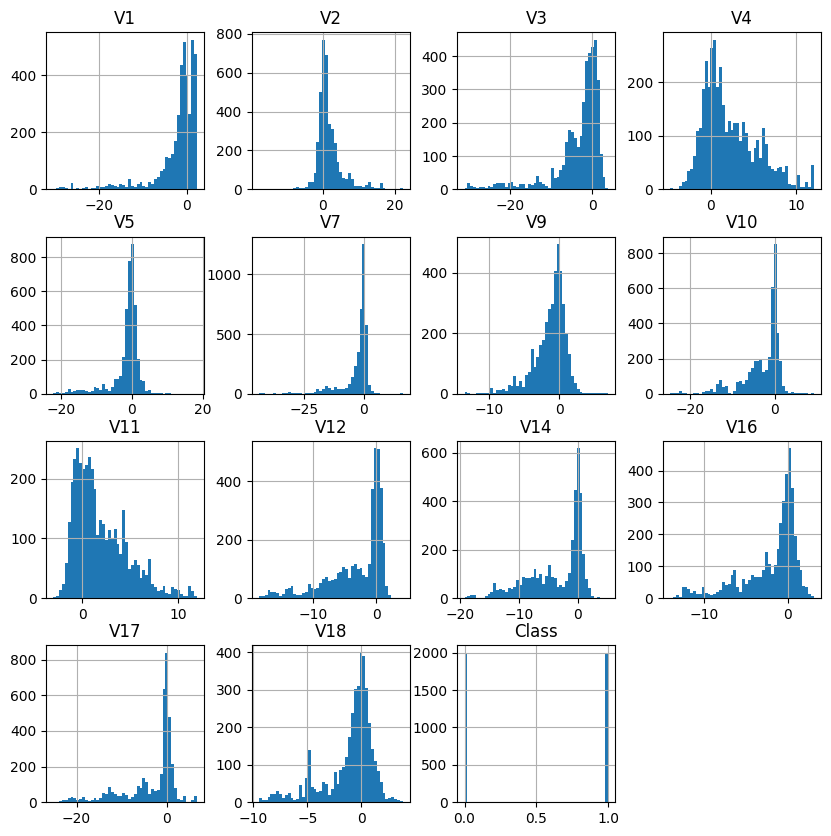

In [19]:
plt.subplots_adjust(hspace=2);
df.hist(bins=50, rwidth=1, figsize=(10, 10));

<Axes: xlabel='Class'>

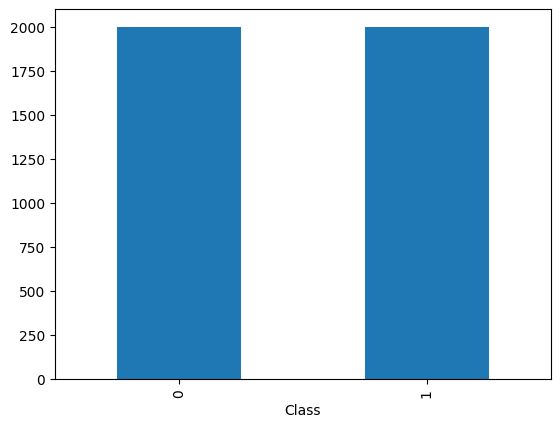

In [20]:
df["Class"].value_counts().plot(kind="bar")

I don't think that dropping that much samples is good, so I tried to keep dataset a bit bigger.
We lost a lot of data, so let's see if it's critical or not

In [21]:
import warnings

warnings.filterwarnings('ignore')

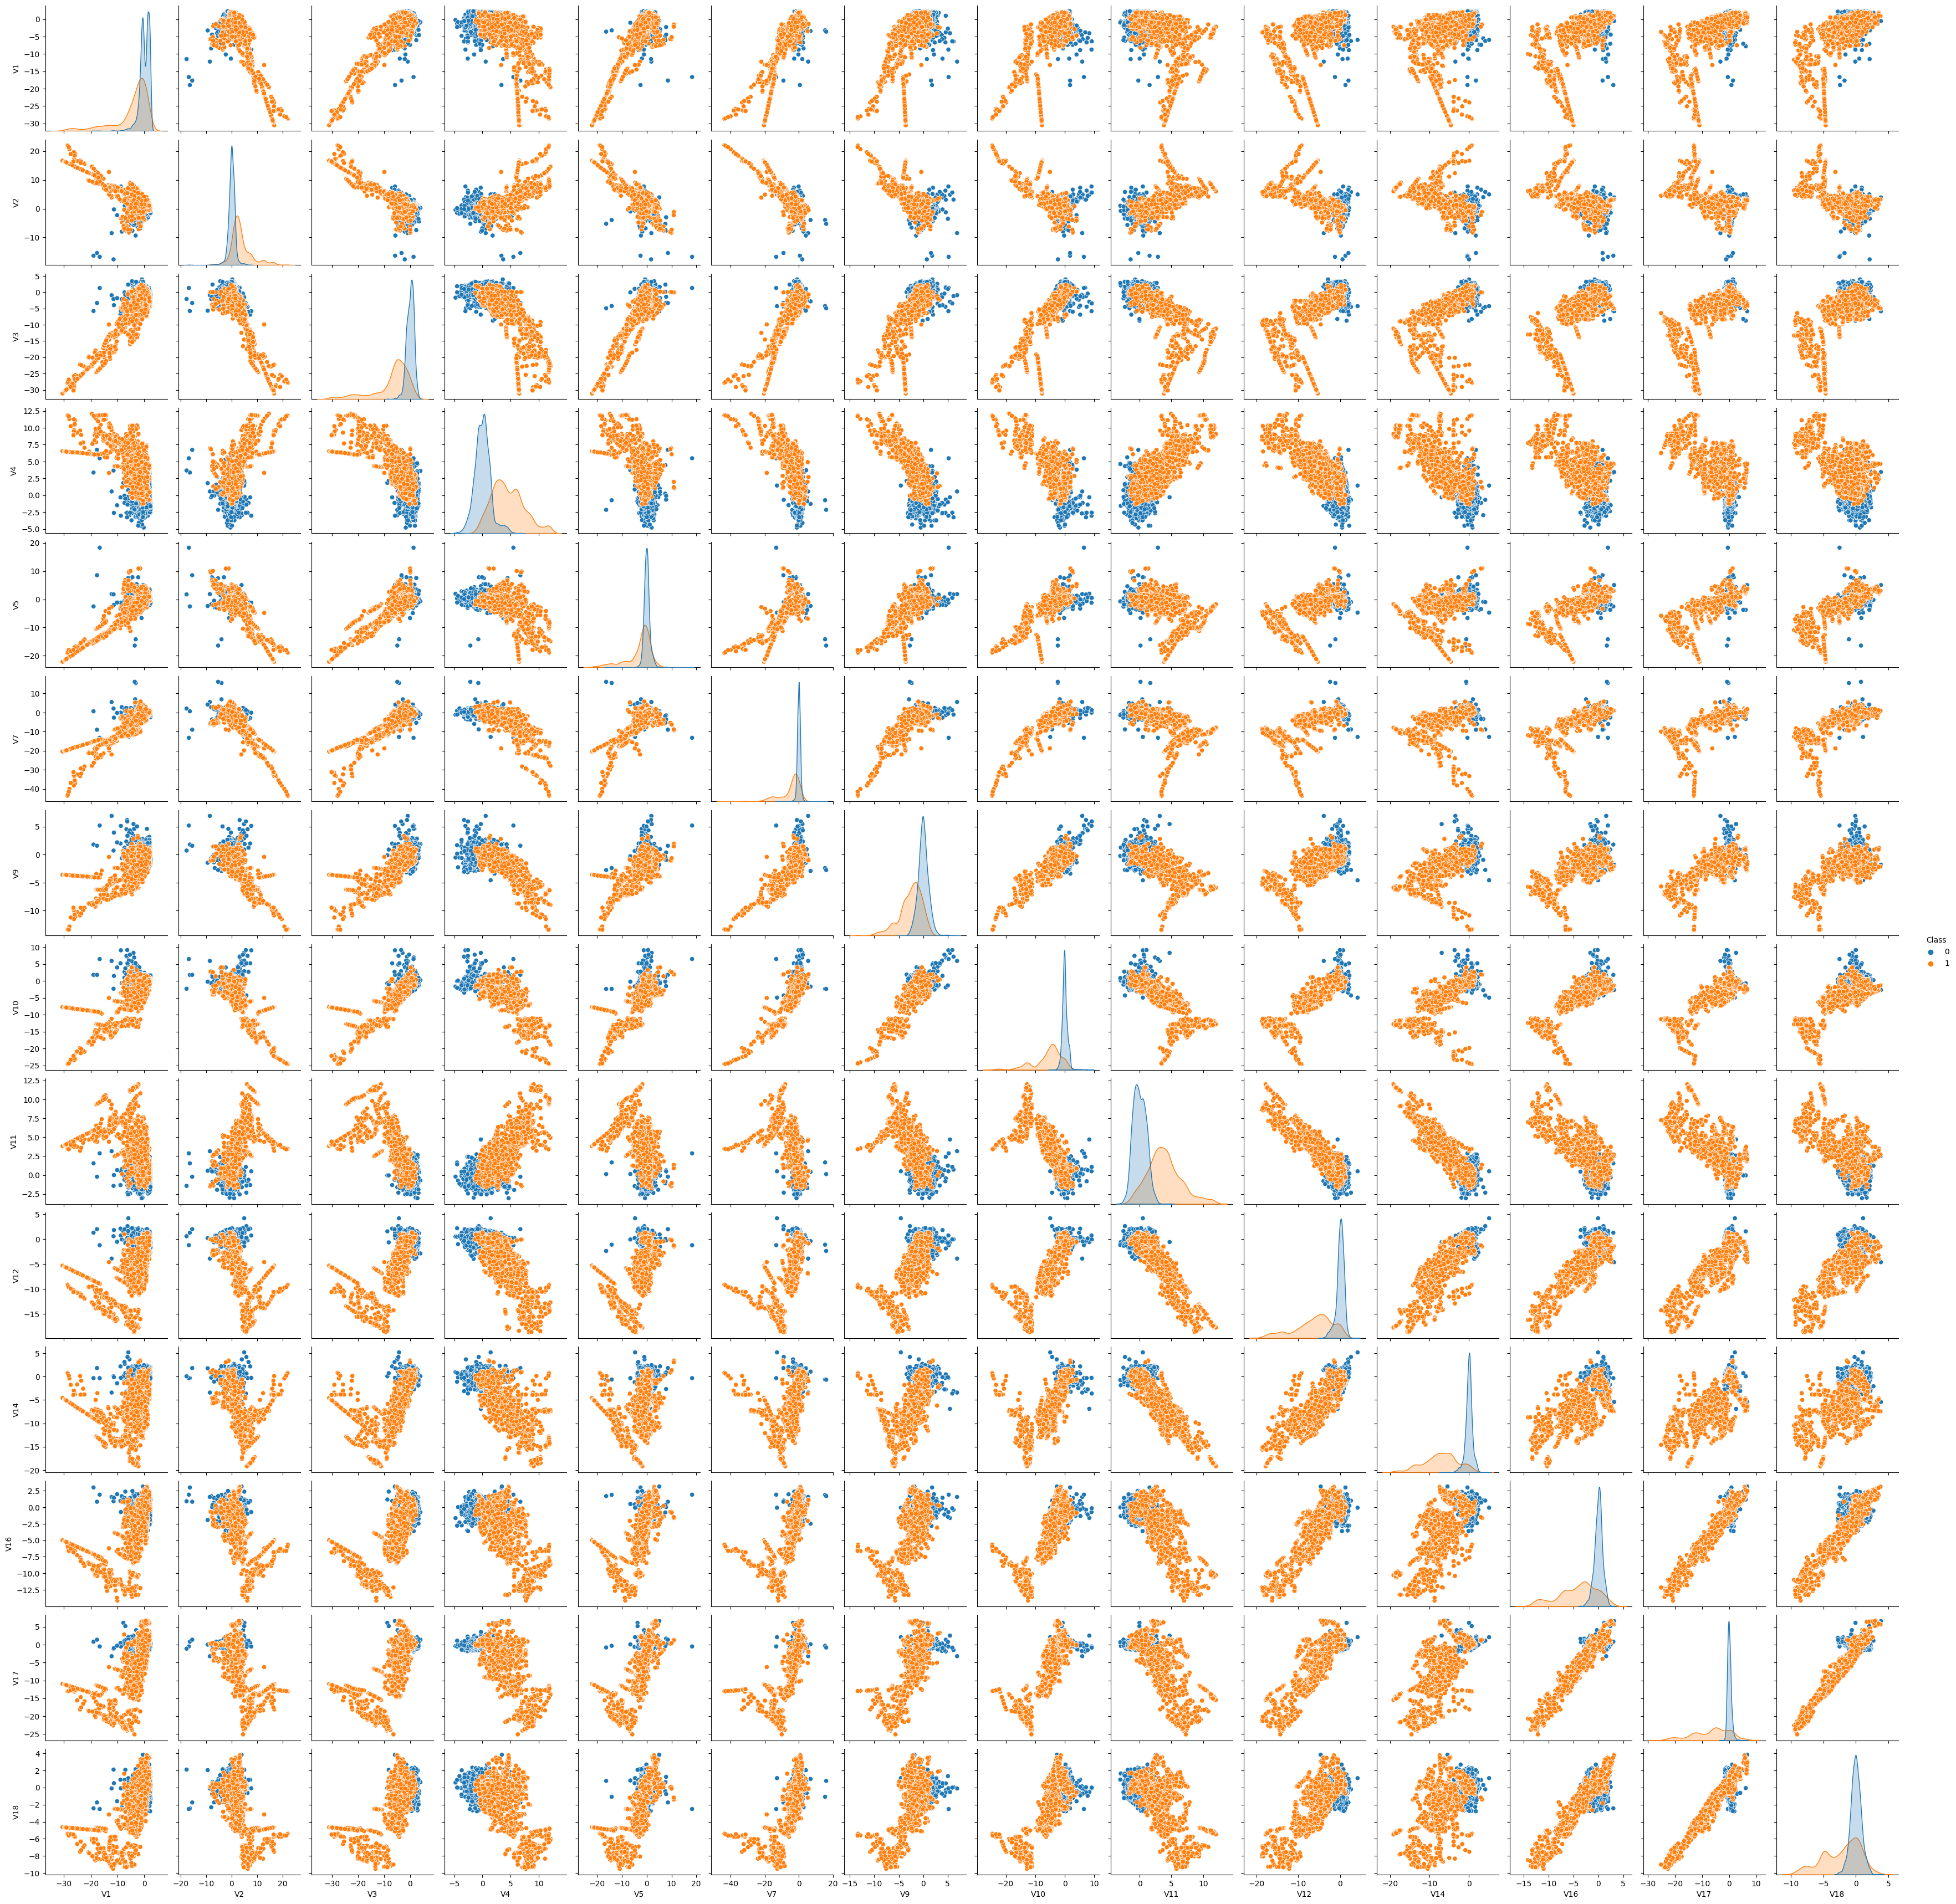

In [22]:
sns.pairplot(df, hue="Class");

Nah... It seems normal transactions are clustered, so we're fine with 2k samples left

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
!pip install lazypredict

In [26]:
from lazypredict.Supervised import LazyClassifier

In [27]:
clf = LazyClassifier(random_state=42)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

 97%|█████████▋| 28/29 [00:06<00:00,  5.44it/s]

[LightGBM] [Info] Number of positive: 1607, number of negative: 1593
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502188 -> initscore=0.008750
[LightGBM] [Info] Start training from score 0.008750


100%|██████████| 29/29 [00:07<00:00,  4.12it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.99               0.99     0.99      0.99   
LabelSpreading                     0.99               0.99     0.99      0.99   
LGBMClassifier                     0.97               0.97     0.97      0.97   
ExtraTreesClassifier               0.97               0.97     0.97      0.97   
KNeighborsClassifier               0.97               0.97     0.97      0.97   
XGBClassifier                      0.96               0.96     0.96      0.96   
BaggingClassifier                  0.95               0.95     0.95      0.95   
RandomForestClassifier             0.95               0.95     0.95      0.95   
AdaBoostClassifier                 0.94               0.94     0.94      0.94   
ExtraTreeClassifier                0.93               0.93     0.93      0.93   
DecisionTreeClassifier             0.93               0.93     0.93      0.93   
SVC                                0.93               0.93     0.93      0.93   
SGDClassifier                      0.92               0.92     0.92      0.92   
CalibratedClassifierCV             0.92               0.92     0.92      0.92   
PassiveAggressiveClassifier        0.92               0.92     0.92      0.92   
Perceptron                         0.92               0.92     0.92      0.92   
LinearSVC                          0.92               0.92     0.92      0.92   
LogisticRegression                 0.92               0.91     0.91      0.91   
QuadraticDiscriminantAnalysis      0.91               0.91     0.91      0.91   
GaussianNB                         0.90               0.90     0.90      0.90   
NuSVC                              0.90               0.90     0.90      0.90   
RidgeClassifier                    0.90               0.90     0.90      0.90   
RidgeClassifierCV                  0.90               0.90     0.90      0.90   
LinearDiscriminantAnalysis         0.90               0.90     0.90      0.90   
BernoulliNB                        0.90               0.90     0.90      0.90   
NearestCentroid                    0.87               0.86     0.86      0.86   
DummyClassifier                    0.49               0.50     0.50      0.32   

                               Time Taken  
Model                                      
LabelPropagation                     0.70  
LabelSpreading                       0.96  
LGBMClassifier                       0.28  
ExtraTreesClassifier                 0.37  
KNeighborsClassifier                 0.10  
XGBClassifier                        0.25  
BaggingClassifier                    0.32  
RandomForestClassifier               0.95  
AdaBoostClassifier                   0.52  
ExtraTreeClassifier                  0.02  
DecisionTreeClassifier               0.11  
SVC                                  0.18  
SGDClassifier                        0.13  
CalibratedClassifierCV               0.47  
PassiveAggressiveClassifier          0.06  
Perceptron                           0.10  
LinearSVC                            0.18  
LogisticRegression                   0.14  
QuadraticDiscriminantAnalysis        0.09  
GaussianNB                           0.02  
NuSVC                                0.46  
RidgeClassifier                      0.08  
RidgeClassifierCV                    0.17  
LinearDiscriminantAnalysis           0.15  
BernoulliNB                          0.02  
NearestCentroid                      0.08  
DummyClassifier                      0.02

LEEET'S GOOOO!!!! 98% Accuracy and F1 on RandomForest!<br>
Let's try tuning this baby!<br>
<img src="https://m.media-amazon.com/images/S/pv-target-images/535d17f12fd5cfa95b3392433d51675fcef74d1bd92662c5c89d371dc5b4161c.jpg" width=50%>

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from lightgbm import LGBMClassifier

In [29]:
df_og

V1    V2    V3    V4    V5    V7    V9   V10   V11   V12   V14  \
0       -1.36 -0.07  2.54  1.38 -0.34  0.24  0.36  0.09 -0.55 -0.62 -0.31   
1        1.19  0.27  0.17  0.45  0.06 -0.08 -0.26 -0.17  1.61  1.07 -0.14   
2       -1.36 -1.34  1.77  0.38 -0.50  0.79 -1.51  0.21  0.62  0.07 -0.17   
3       -0.97 -0.19  1.79 -0.86 -0.01  0.24 -1.39 -0.05 -0.23  0.18 -0.29   
4       -1.16  0.88  1.55  0.40 -0.41  0.59  0.82  0.75 -0.82  0.54 -1.12   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
284802 -11.88 10.07 -9.83 -2.07 -5.36 -4.92  1.91  4.36 -1.59  2.71  4.63   
284803  -0.73 -0.06  2.04 -0.74  0.87  0.02  0.58 -0.98 -0.15  0.92 -0.68   
284804   1.92 -0.30 -3.25 -0.56  2.63 -0.30  0.43 -0.48  0.41  0.06 -0.51   
284805  -0.24  0.53  0.70  0.69 -0.38 -0.69  0.39 -0.40 -1.93 -0.96  0.45   
284806  -0.53 -0.19  0.70 -0.51 -0.01  1.58  0.49 -0.92 -1.04 -0.03 -0.08   

         V16   V17   V18  Class  
0      -0.47  0.21  0.03      0  
1       0.46 -0.11 -0.18      0  
2      -2.89  1.11 -0.12      0  
3      -1.06 -0.68  1.97      0  
4      -0.45 -0.24 -0.04      0  
...      ...   ...   ...    ...  
284802  1.11  1.99  0.51      0  
284803 -0.71 -0.03 -1.22      0  
284804  0.14  0.31  0.40      0  
284805 -0.61  0.51  1.11      0  
284806 -0.30 -0.66  0.17      0  

[284807 rows x 15 columns]

In [30]:
#from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [43]:
models = {
    'LP': LabelPropagation(),
    'LS': LabelSpreading(),
    'LGBM': XGBClassifier()
}


f1_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1_scores[name] = f1_score(y_test, y_pred, pos_label=1)

print("F1 Scores for class == 1:")
for name, score in f1_scores.items():
    print(f"{name}: {score:.4f}")

F1 Scores for class == 1:
LP: 0.9874
LS: 0.9874
LGBM: 0.9643


In [44]:
LP = LabelPropagation()

In [47]:
grid = {
    "n_neighbors": range(5, 10),
    "kernel": ["rbf", "knn"]
}

best_lp = GridSearchCV(LP, grid, cv=3, n_jobs=-1)
best_lp.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LabelPropagation(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'knn'], 'n_neighbors': range(5, 10)})

In [50]:
best_lp.score(X_test, y_test)

0.9875

Not really improved

In [51]:
from sklearn.ensemble import VotingClassifier

In [52]:
LP = LabelPropagation()
LS = LabelSpreading()
LGBM = XGBClassifier()

In [53]:
voting_clf = VotingClassifier(estimators=[
    ("LP", LP),
    ("LS", LS),
    ("LGBM", LGBM)
    ],
    voting="soft"
)

In [54]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LP', LabelPropagation()),
                             ('LS', LabelSpreading()),
                             ('LGBM',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [55]:
y_pred = voting_clf.predict(X_test)
print(f1_score(y_test, y_pred))

0.9873737373737372


In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       407
           1       0.98      0.99      0.99       393

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



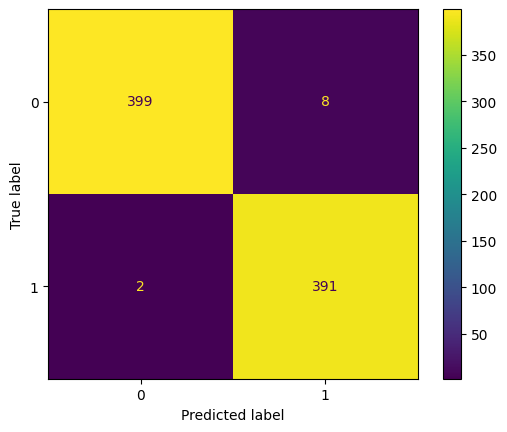

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot();

Not Bad! We misclassified only 2 frauds out of 400 of them

In [74]:
from sklearn.metrics import roc_curve

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

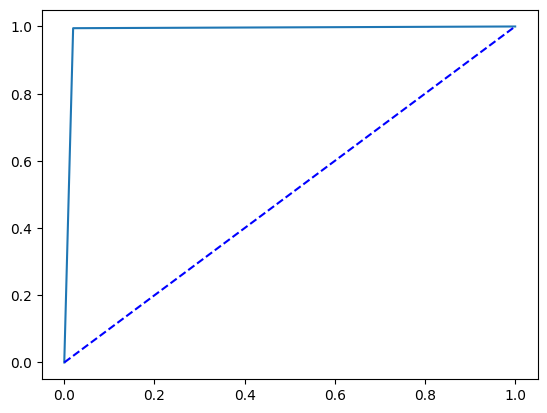

In [81]:
plt.plot(fpr, tpr);
plt.plot(np.linspace(0, 1), np.linspace(0, 1), "b--");

We have plateu here

I tried changing threshold a bit, but the thing is... We already have nice FN ratio

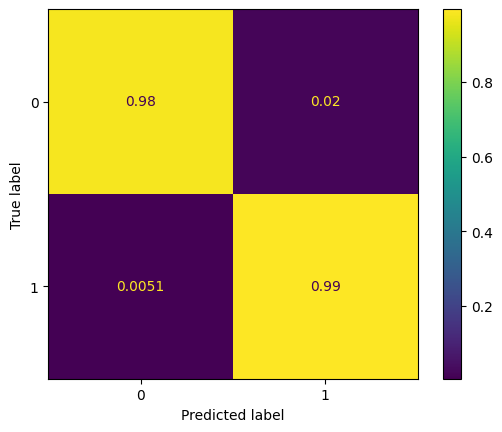

In [109]:
conf_matrix = confusion_matrix(y_test, y_pred, normalize="true")
ConfusionMatrixDisplay(conf_matrix).plot();

**Yoo!!! Yes Sir!** <br>
<img src="https://media1.tenor.com/m/842OL8w8qOoAAAAC/zoomer-tide-pods.gif" width=40%>

# **CONCLUSION**
I got 98.76% accuracy<br>

# **Peak Performance:** <br>
# **98.8%**<br>
<img src="https://media1.tenor.com/m/3nYQ62ARMpgAAAAd/leo-dancing.gif" width=40%><br>